In [16]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pytidycensus as tc
import os

In [17]:
# Set API Key for pytidycensus
tc.set_census_api_key("c33d610fd1795d8a01e54b2662fd81cd876af440")

Census API key has been set for this session.


In [18]:
va_census = tc.get_acs(
  geography="tract",
  variables=["C17002_001E", "C17002_002E", "C17002_003E", "B01003_001E"],
  state="VA",
  year=2019,
  output="wide"
)

Getting data from the 2015-2019 5-year ACS


In [19]:
print(va_census.head(2))
print('Shape: ', va_census.shape)

         GEOID  C17002_001E  C17002_002E  C17002_003E  B01003_001E state  \
0  51065020200         4804          197          146         4863    51   
1  51059460702         4578           58           30         4578    51   

  county   tract                       NAME  C17002_001_moe  C17002_002_moe  \
0    065  020200  Fluvanna County, Virginia           387.0           144.0   
1    059  460702   Fairfax County, Virginia           239.0            62.0   

   C17002_003_moe B01003_001_moe  
0           111.0          383.0  
1            27.0          239.0  
Shape:  (1907, 13)


In [20]:
va_tract = tc.get_acs(
  geography="tract",
  variables=["C17002_001E", "C17002_002E", "C17002_003E", "B01003_001E"],
  state="VA",
  year=2019,
  output="wide",
  geometry=True
)

va_tract = va_tract.to_crs(epsg=32617)

print(va_tract.head(2))
print('Shape: ', va_tract.shape)

print("\nThe projection is: {}".format(va_tract.crs))

Getting data from the 2015-2019 5-year ACS
         GEOID                                           geometry  \
0  51041100206  POLYGON ((803918.453 4150249.325, 805414.927 4...   
1  51059481202  POLYGON ((813389.313 4316330.661, 813442.73 43...   

   C17002_001E  C17002_002E  C17002_003E  B01003_001E state county   tract  \
0         6506          126          251         6513    51    041  100206   
1         6088          218          406         6088    51    059  481202   

                            NAME  C17002_001_moe  C17002_002_moe  \
0  Chesterfield County, Virginia           568.0            94.0   
1       Fairfax County, Virginia           465.0           261.0   

   C17002_003_moe B01003_001_moe  
0           193.0          568.0  
1           314.0          465.0  
Shape:  (1900, 14)

The projection is: EPSG:32617


In [21]:
va_tract["Poverty Rate"] = (
  (va_tract["C17002_002E"] + va_tract["C17002_003E"]) / va_tract["B01003_001E"] * 100
)

va_tract.head(5)

,GEOID,geometry,C17002_001E,C17002_002E,C17002_003E,B01003_001E,state,county,tract,NAME,C17002_001_moe,C17002_002_moe,C17002_003_moe,B01003_001_moe,Poverty Rate
0,51041100206,"POLYGON ((803918.453 4150249.325, 805414.927 4...",6506,126,251,6513,51,041,100206,"Chesterfield County, Virginia",568.0,94.0,193.0,568.0,5.788423
1,51059481202,"POLYGON ((813389.313 4316330.661, 813442.73 43...",6088,218,406,6088,51,059,481202,"Fairfax County, Virginia",465.0,261.0,314.0,465.0,10.249671
2,51710004800,"POLYGON ((920472.849 4087869.848, 920488.191 4...",1413,430,485,1418,51,710,004800,"Norfolk city, Virginia",130.0,176.0,167.0,130.0,64.527504
3,51117930300,"POLYGON ((735669.894 4070768.963, 735560.687 4...",3141,246,176,3644,51,117,930300,"Mecklenburg County, Virginia",288.0,149.0,102.0,306.0,11.580681
4,51143010300,"POLYGON ((622728.779 4088521.379, 623314.868 4...",3869,152,387,3869,51,143,010300,"Pittsylvania County, Virginia",433.0,81.0,294.0,433.0,13.931248


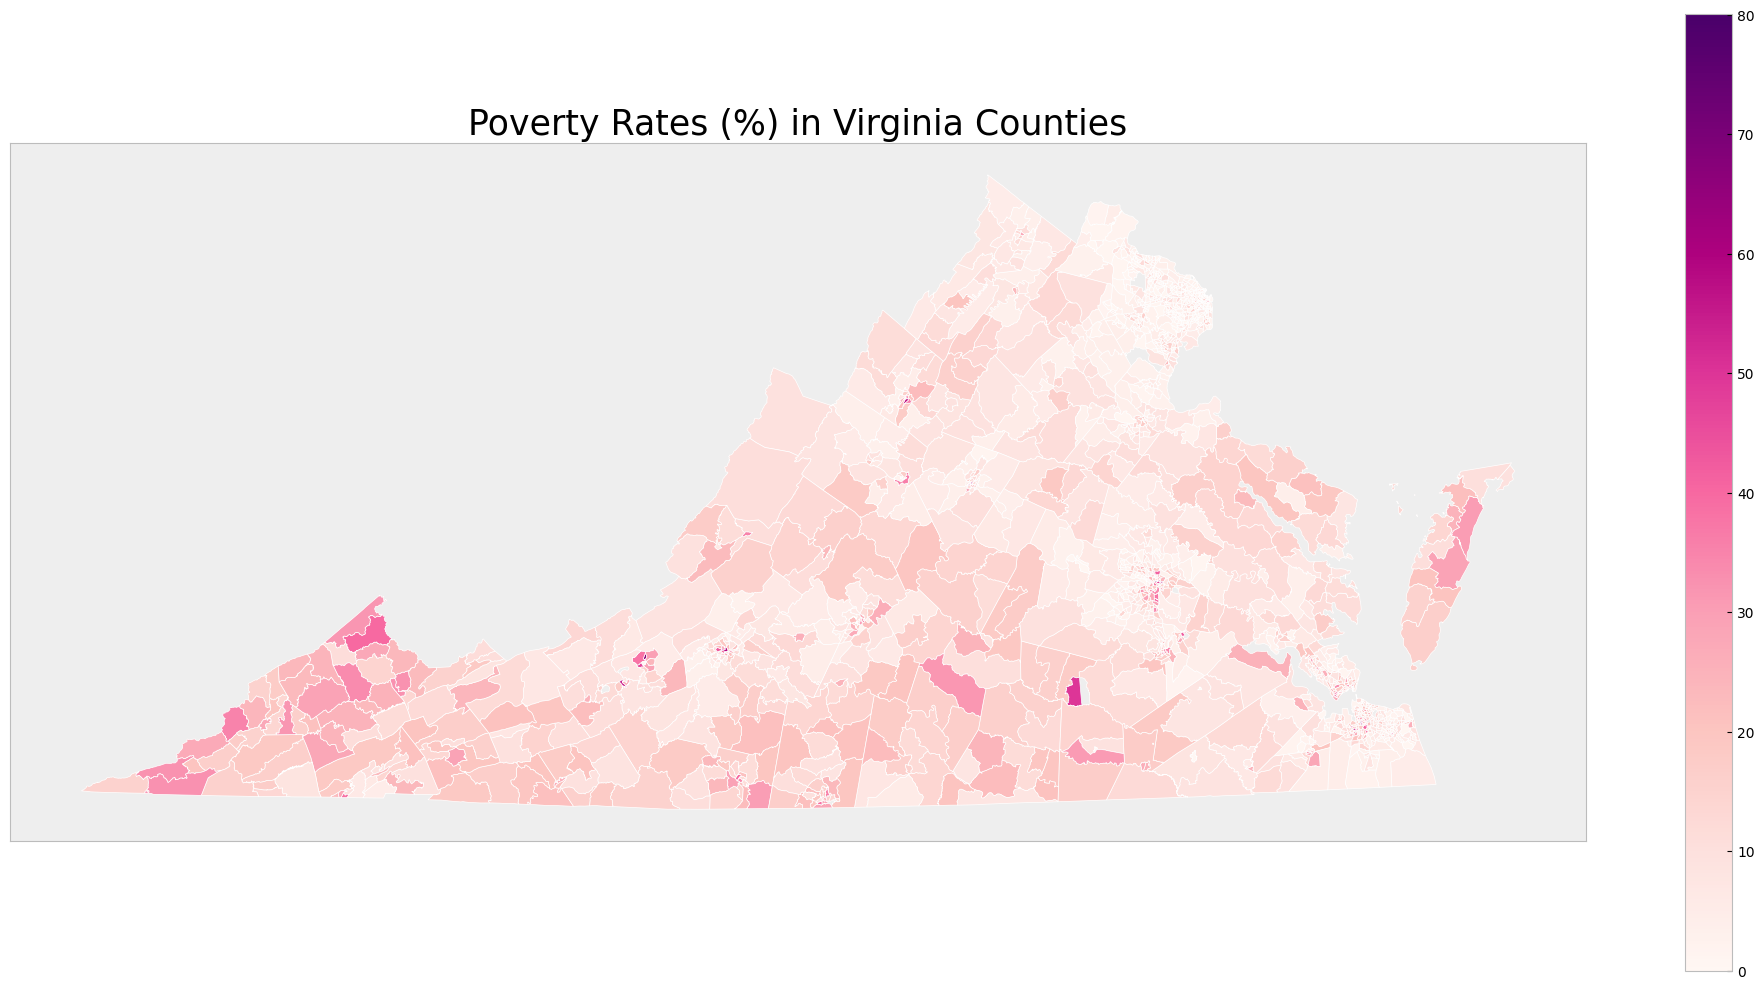

In [22]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
va_tract.plot(
  column="Poverty Rate",
  ax=ax,
  cmap="RdPu",
  legend=True,
  edgecolor='white',
  linewidth=0.5
)
# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Poverty Rates (%) in Virginia Counties', fontdict={'fontsize': '25', 'fontweight': '3'})

# Remove axis ticks for cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()